<a href="https://colab.research.google.com/github/LeaCarop/MultiClassClassification/blob/main/MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset MNIST contiene un mapa de pixeles mostrando cómo las personas han escrito algunos números.

**Librerías y dataset**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [ ]:
# DESCARGAR DATASET
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

**Visualizar datos**

In [ ]:
x_train[5430]  # visualizo un ejemplo al azar

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  22, 209, 151,   7,   7,   7,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,  98, 253, 253, 253, 253, 253, 253, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,  97, 253, 253, 253, 253, 240, 146, 215, 223,  40,   0,   0

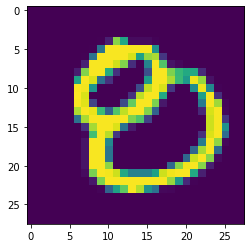

In [ ]:
plt.imshow(x_train[5430]) # uso colores para ver el array

In [ ]:
x_train[5430][10]  # fila 10 dentro del array 

array([  0,   0,   0,   0,   0,   0, 254, 251, 133,   0,   0,   0,   0,   0,  59, 231, 253, 240,  41,   0,   0, 125, 249, 119,   2,   0,   0,   0], dtype=uint8)

In [ ]:
x_train[5430][10][16] # dentro de la fila 10, puesto 16 (empezar por 0, 1, 2... 16)

253

**Normalizar valores**

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10]) 

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


**Definir funciones del modelo**

In [ ]:
def plot_curve(epochs, hist, list_of_metrics):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()


In [ ]:
def crear_modelo(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # las características se almacenan en una matriz bidimensional 28x28 

  model.add(tf.keras.layers.Dense(units=32, activation='relu')) # primera capa
  
  model.add(tf.keras.layers.Dropout(rate=0.2)) # a la primera capa se le van a apagar el 20% de las neuronas para evitar el sobreajuste

  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))   # segunda capa con activacion softmax porque hay varias clases
                           
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

**Hiperparámetros y entrenamiento**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
12/12 [==============================] - 1s 50ms/step - loss: 1.7338 - accuracy: 0.4547 - val_loss: 1.0020 - val_accuracy: 0.7903
Epoch 2/50
12/12 [==============================] - 0s 31ms/step - loss: 0.9040 - accuracy: 0.7352 - val_loss: 0.5215 - val_accuracy: 0.8711
Epoch 3/50
12/12 [==============================] - 0s 30ms/step - loss: 0.6197 - accuracy: 0.8154 - val_loss: 0.4009 - val_accuracy: 0.8952
Epoch 4/50
12/12 [==============================] - 0s 31ms/step - loss: 0.5102 - accuracy: 0.8502 - val_loss: 0.3446 - val_accuracy: 0.9073
Epoch 5/50
12/12 [==============================] - 0s 31ms/step - loss: 0.4545 - accuracy: 0.8653 - val_loss: 0.3116 - val_accuracy: 0.9162
Epoch 6/50
12/12 [==============================] - 0s 30ms/step - loss: 0.4150 - accuracy: 0.8779 - val_loss: 0.2878 - val_accuracy: 0.9212
Epoch 7/50
12/12 [==============================] - 0s 30ms/step - loss: 0.3888 - accuracy: 0.8868 - val_loss: 0.2726 - val_accuracy: 0.9250
Epoch 8/50
12

[0.14816240966320038, 0.9552000164985657]

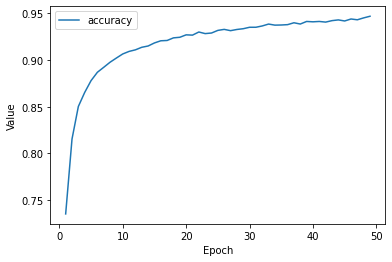

In [ ]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = crear_modelo(learning_rate)

epochs, hist = train(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

print("\n Evaluar el nuevo modelo con el conjunto de validación:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

**Optimizar el modelo**

In [ ]:
def crear_modelo(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # las características se almacenan en una matriz bidimensional 28x28 

  model.add(tf.keras.layers.Dense(units=256, activation='relu')) # primera capa
  
  model.add(tf.keras.layers.Dropout(rate=0.2)) # a la primera capa se le van a apagar el 20% de las neuronas para evitar el sobreajuste

  model.add(tf.keras.layers.Dense(units=32, activation='softmax'))   # segunda capa con activacion softmax porque hay varias clases
                           
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 2s 114ms/step - loss: 1.2998 - accuracy: 0.6407 - val_loss: 0.4137 - val_accuracy: 0.8795
Epoch 2/50
12/12 [==============================] - 1s 100ms/step - loss: 0.4476 - accuracy: 0.8631 - val_loss: 0.3149 - val_accuracy: 0.9103
Epoch 3/50
12/12 [==============================] - 1s 99ms/step - loss: 0.3504 - accuracy: 0.8970 - val_loss: 0.2646 - val_accuracy: 0.9255
Epoch 4/50
12/12 [==============================] - 1s 101ms/step - loss: 0.2929 - accuracy: 0.9133 - val_loss: 0.2365 - val_accuracy: 0.9341
Epoch 5/50
12/12 [==============================] - 1s 100ms/step - loss: 0.2577 - accuracy: 0.9257 - val_loss: 0.2116 - val_accuracy: 0.9411
Epoch 6/50
12/12 [==============================] - 1s 102ms/step - loss: 0.2283 - accuracy: 0.9346 - val_loss: 0.1932 - val_accuracy: 0.9457
Epoch 7/50
12/12 [==============================] - 1s 99ms/step - loss: 0.2050 - accuracy: 0.9414 - val_loss: 0.1779 - val_accuracy: 0.9506
Epoch 8/50
12/12 [=

[0.07029608637094498, 0.9787999987602234]

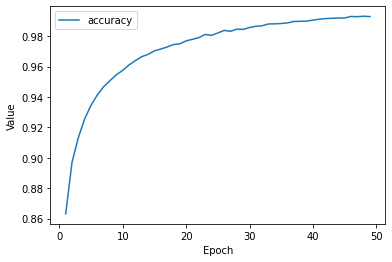

In [ ]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = crear_modelo(learning_rate)

epochs, hist = train(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

print("\n Evaluar el nuevo modelo con el conjunto de validación:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

In [ ]:
def crear_modelo(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # las características se almacenan en una matriz bidimensional 28x28 

  model.add(tf.keras.layers.Dense(units=256, activation='relu')) # primera capa
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # a la primera capa se le van a apagar el 20% de las neuronas para evitar el sobreajuste

  model.add(tf.keras.layers.Dense(units=32, activation='softmax'))   # segunda capa con activacion softmax porque hay varias clases
                           
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist   

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 2s 116ms/step - loss: 1.5460 - accuracy: 0.5535 - val_loss: 0.4528 - val_accuracy: 0.8699
Epoch 2/50
12/12 [==============================] - 1s 102ms/step - loss: 0.5431 - accuracy: 0.8310 - val_loss: 0.3261 - val_accuracy: 0.9089
Epoch 3/50
12/12 [==============================] - 1s 100ms/step - loss: 0.3925 - accuracy: 0.8855 - val_loss: 0.2733 - val_accuracy: 0.9233
Epoch 4/50
12/12 [==============================] - 1s 103ms/step - loss: 0.3244 - accuracy: 0.9061 - val_loss: 0.2323 - val_accuracy: 0.9348
Epoch 5/50
12/12 [==============================] - 1s 100ms/step - loss: 0.2875 - accuracy: 0.9163 - val_loss: 0.2069 - val_accuracy: 0.9422
Epoch 6/50
12/12 [==============================] - 1s 100ms/step - loss: 0.2558 - accuracy: 0.9254 - val_loss: 0.1892 - val_accuracy: 0.9480
Epoch 7/50
12/12 [==============================] - 1s 99ms/step - loss: 0.2357 - accuracy: 0.9321 - val_loss: 0.1733 - val_accuracy: 0.9522
Epoch 8/50
12/12 [

[0.07322707772254944, 0.9793000221252441]

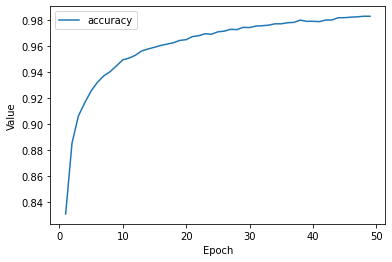

In [ ]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = crear_modelo(learning_rate)

epochs, hist = train(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

print("\n Evaluar el nuevo modelo con el conjunto de validación:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

He probado dos modelos distintos para optimizar:
- En el primero, aumento el número de nodos en ambas capas
- En el segundo, mantengo el nuevo número de nodos en ambas capas y aumento el Dropout a 0.5

Los resultados muestran que consigo casi una precisión del 98% usando los datos de validación, siendo estos unos resultados mejores que el modelo sin optimizar.